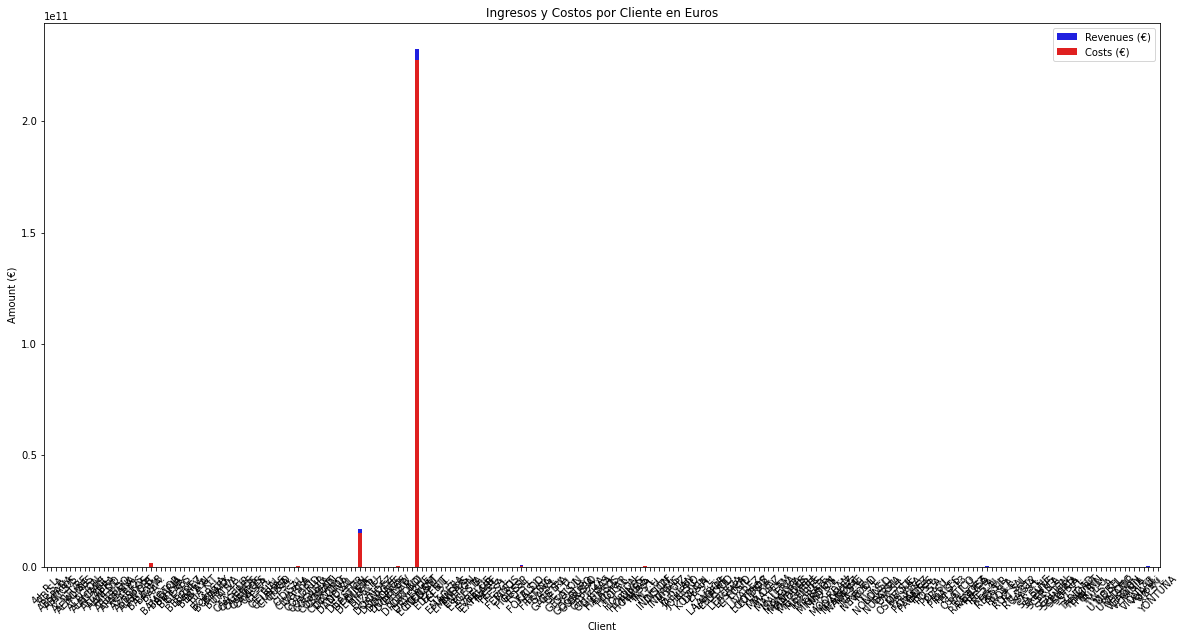

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo Excel
df = pd.read_excel("./project_dataset/IronHack_Media_dataset.xlsx")

# Convertir la columna 'Date' a formato de fecha para análisis de tiempo
df['Date'] = pd.to_datetime(df['Date'])

# Diccionario de tasas de conversión (al 6 de noviembre de 2024)
conversion_rates = {
    'EUR': 1,
    'Peso CO': 0.000211,
    'Peso MX': 0.05,
}

# Convertir los ingresos y costos a euros utilizando las tasas de conversión
df['Revenues_EUR'] = df.apply(lambda row: row['Revenues'] * conversion_rates.get(row['Currency'], 1), axis=1)
df['Costs_EUR'] = df.apply(lambda row: row['Costs'] * conversion_rates.get(row['Currency'], 1), axis=1)

# Análisis por Cliente: Agrupar por cliente y sumar los ingresos y costos en euros
cliente_df = df.groupby('Client').agg({'Revenues_EUR': 'sum', 'Costs_EUR': 'sum'}).reset_index()
cliente_df['Profit'] = cliente_df['Revenues_EUR'] - cliente_df['Costs_EUR']
¨
# Visualización de Ingresos y Costos por Cliente
plt.figure(figsize=(20, 10))
sns.barplot(x='Client', y='Revenues_EUR', data=cliente_df, color='b', label='Revenues (€)')
sns.barplot(x='Client', y='Costs_EUR', data=cliente_df, color='r', label='Costs (€)')
plt.xlabel("Client")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Ingresos y Costos por Cliente en Euros")
plt.xticks(rotation=45)
plt.show()




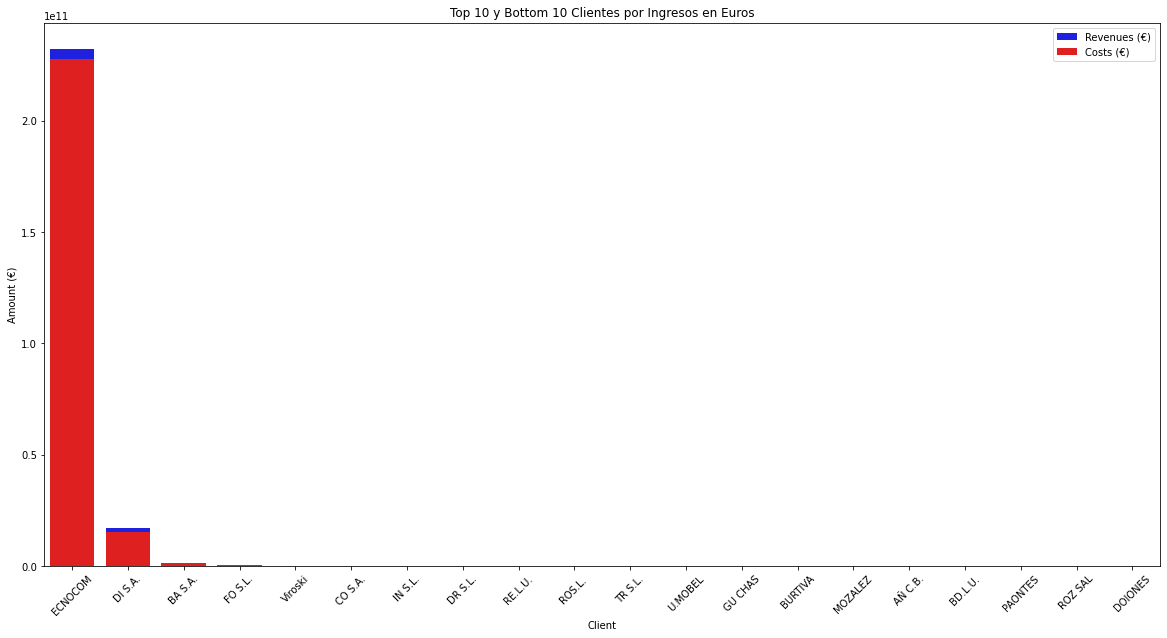

In [18]:
# Mostrar los 10 clientes más altos y más bajos por ingresos
top_10_clients = cliente_df.nlargest(10, 'Revenues_EUR')
bottom_10_clients = cliente_df.nsmallest(10, 'Revenues_EUR')

# Unir los 10 más altos y 10 más bajos
final_cliente_df = pd.concat([top_10_clients, bottom_10_clients])

# Visualización de Ingresos y Costos por Cliente (solo los 10 más altos y bajos)
plt.figure(figsize=(20, 10))
sns.barplot(x='Client', y='Revenues_EUR', data=final_cliente_df, color='b', label='Revenues (€)')
sns.barplot(x='Client', y='Costs_EUR', data=final_cliente_df, color='r', label='Costs (€)')
plt.xlabel("Client")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Top 10 y Bottom 10 Clientes por Ingresos en Euros")
plt.xticks(rotation=45)
plt.show()

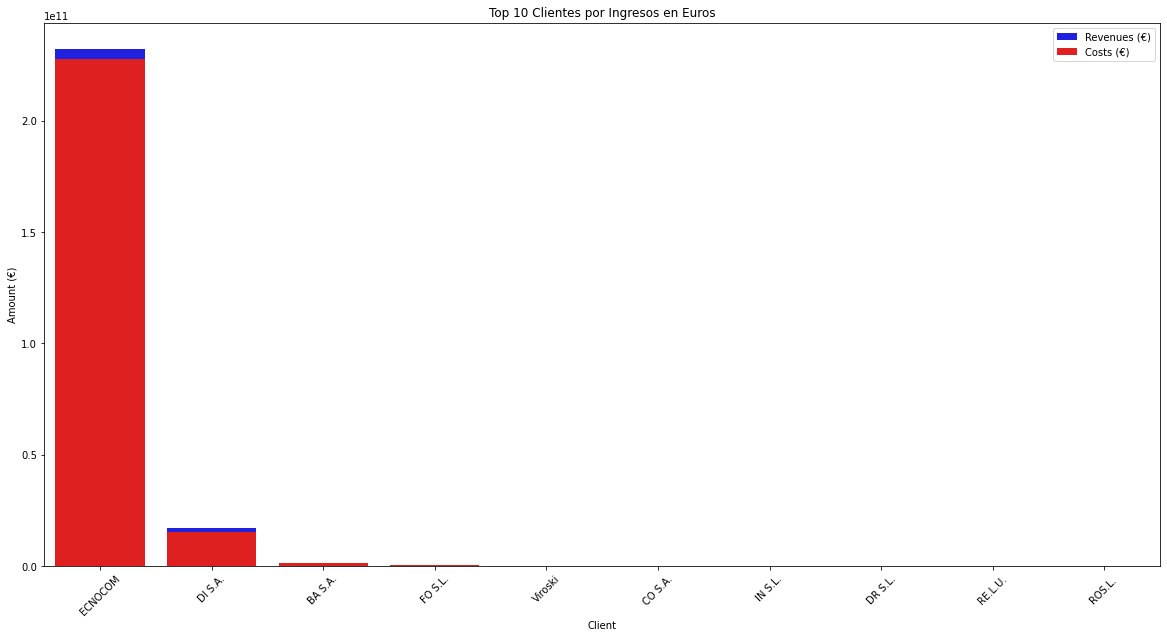

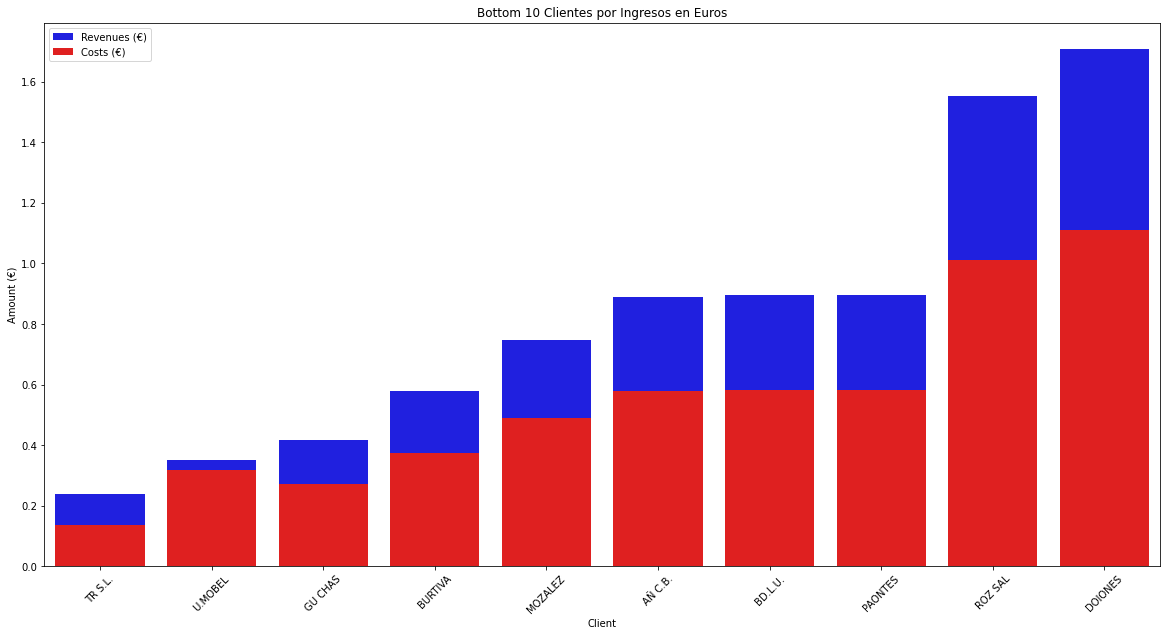

In [24]:

# Crear el gráfico para los 10 clientes más altos
plt.figure(figsize=(20, 10))
sns.barplot(x='Client', y='Revenues_EUR', data=top_10_clients, color='b', label='Revenues (€)')
sns.barplot(x='Client', y='Costs_EUR', data=top_10_clients, color='r', label='Costs (€)')
plt.xlabel("Client")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Top 10 Clientes por Ingresos en Euros")
plt.xticks(rotation=45)
plt.show()

# Crear el gráfico para los 10 clientes más bajos
plt.figure(figsize=(20, 10))
sns.barplot(x='Client', y='Revenues_EUR', data=bottom_10_clients, color='b', label='Revenues (€)')
sns.barplot(x='Client', y='Costs_EUR', data=bottom_10_clients, color='r', label='Costs (€)')
plt.xlabel("Client")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Bottom 10 Clientes por Ingresos en Euros")
plt.xticks(rotation=45)
plt.show()

### 1. Gráfico de Ingresos y Costos por Cliente

Este gráfico muestra los ingresos y costos totales para cada cliente. Cada barra representa un cliente específico, y las barras están divididas en dos colores:

    Azul: representa los ingresos generados por cada cliente.
    Rojo: representa los costos asociados con cada cliente.

La diferencia entre la altura de las barras azules y rojas indica la rentabilidad. Si la barra azul es significativamente más alta que la roja, significa que el cliente es rentable (mayor ingreso en comparación con los costos). Por el contrario, si las barras son de altura similar o la barra roja es más alta, el cliente podría estar generando pérdidas o no ser tan rentable.

Este gráfico es útil para identificar rápidamente cuáles clientes son más rentables y cuáles pueden necesitar ajustes, como una revisión de los costos o la implementación de estrategias de venta para aumentar ingresos.

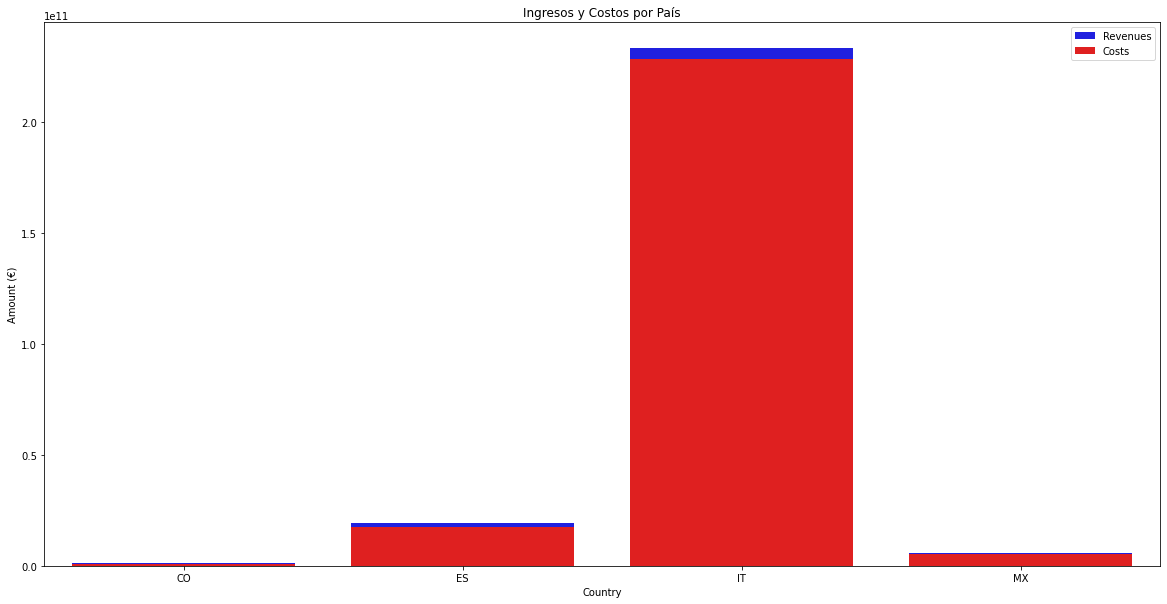

In [20]:
# Análisis por País
# Agrupar por país y calcular los KPIs (Ingresos, Costos y Beneficios)
pais_df = df.groupby('Country').agg({'Revenues': 'sum', 'Costs': 'sum'}).reset_index()
pais_df['Profit'] = pais_df['Revenues'] - pais_df['Costs']


# Visualización de Ingresos y Costos por País
plt.figure(figsize=(20, 10))
sns.barplot(x='Country', y='Revenues', data=pais_df, color='b', label='Revenues')
sns.barplot(x='Country', y='Costs', data=pais_df, color='r', label='Costs')
plt.xlabel("Country")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Ingresos y Costos por País")
plt.show()

### 2. Gráfico de Ingresos y Costos por País

Este gráfico tiene un enfoque similar al anterior, pero en lugar de agrupar por cliente, estamos agrupando por país. Aquí:

    Eje X: muestra los países en los que opera la empresa.
    Azul: representa los ingresos generados en cada país.
    Rojo: representa los costos asociados con cada país.

Este gráfico ayuda a analizar el rendimiento de la empresa en distintos países, permitiendo comparar la rentabilidad geográfica. Es especialmente útil para entender si algunos países son más rentables que otros y para decidir si es conveniente mantener, expandir o reducir la presencia en determinados mercados.

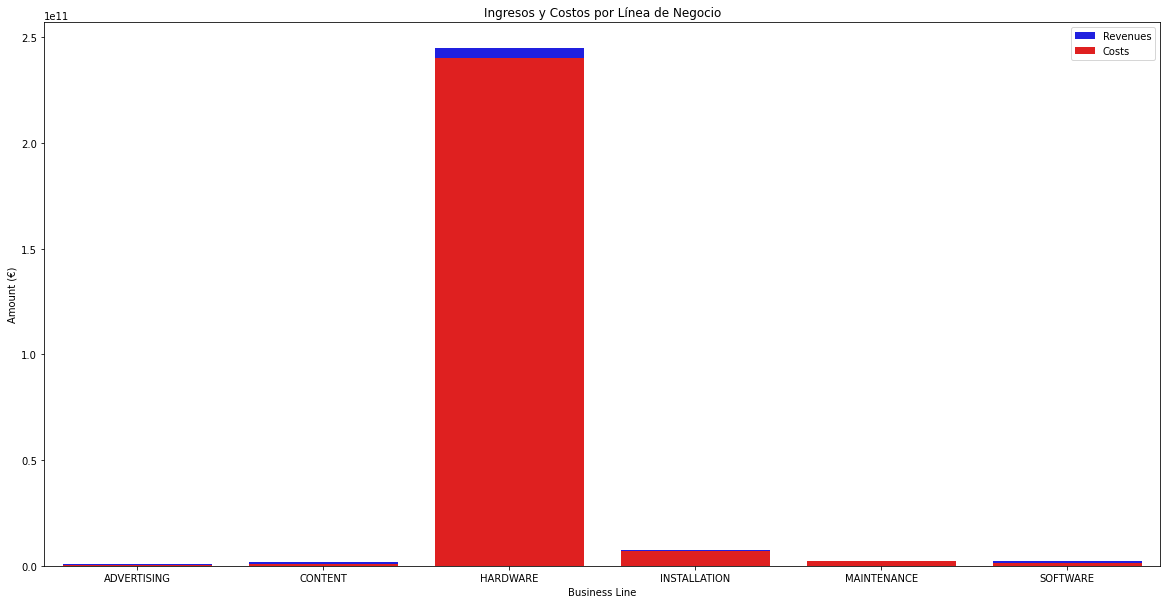

In [21]:
# Análisis por Línea de Negocio
# Agrupar por línea de negocio y calcular los KPIs
linea_negocio_df = df.groupby('Business line').agg({'Revenues': 'sum', 'Costs': 'sum'}).reset_index()
linea_negocio_df['Profit'] = linea_negocio_df['Revenues'] - linea_negocio_df['Costs']

# Visualización de Ingresos y Costos por Línea de Negocio
plt.figure(figsize=(20, 10))
sns.barplot(x='Business line', y='Revenues', data=linea_negocio_df, color='b', label='Revenues')
sns.barplot(x='Business line', y='Costs', data=linea_negocio_df, color='r', label='Costs')
plt.xlabel("Business Line")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Ingresos y Costos por Línea de Negocio")
plt.show()

### 3. Gráfico de Ingresos y Costos por Línea de Negocio

En este gráfico, comparamos los ingresos y costos para cada línea de negocio:

    Eje X: representa las diferentes líneas de negocio (como Hardware, Mantenimiento, Instalación, etc.).
    Azul: muestra los ingresos generados en cada línea de negocio.
    Rojo: muestra los costos asociados con cada línea de negocio.

Este gráfico permite identificar las líneas de negocio más rentables y las que tienen márgenes de ganancia reducidos o pérdidas. Por ejemplo, si una línea de negocio tiene altos costos y bajos ingresos, podríamos considerar revisar su estrategia, reducir costos o enfocarnos en mejorar la eficiencia en esa área.

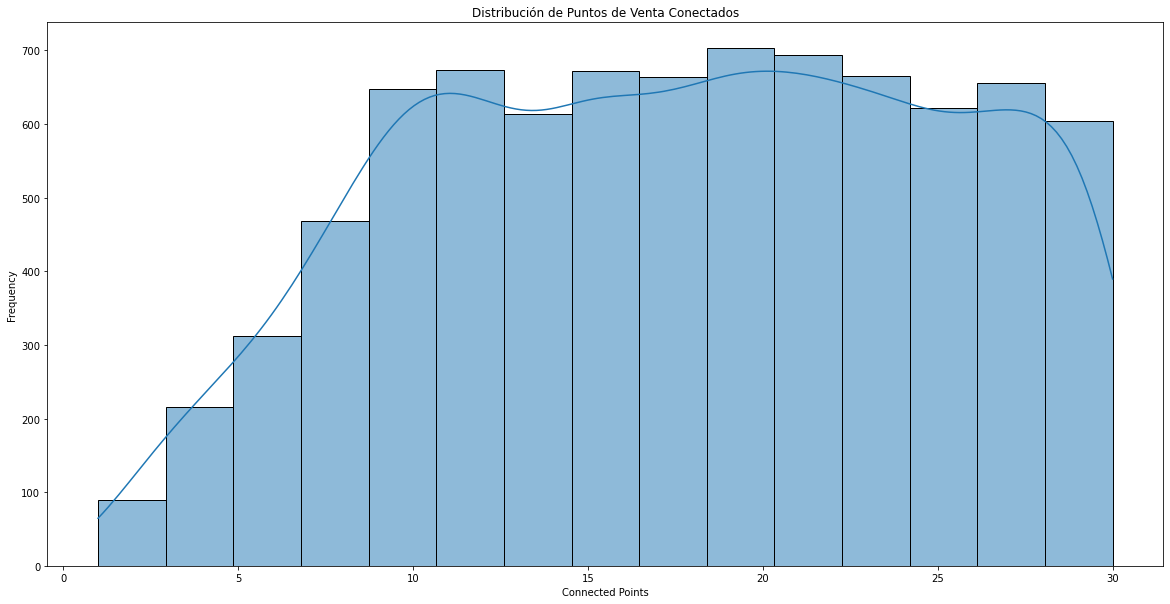

In [22]:
# Análisis adicional: Distribución de puntos de venta conectados
plt.figure(figsize=(20, 10))
sns.histplot(df['Connected points'], bins=15, kde=True)
plt.title("Distribución de Puntos de Venta Conectados")
plt.xlabel("Connected Points")
plt.ylabel("Frequency")
plt.show()

### 4. Histograma de la Distribución de Puntos de Venta Conectados

Este histograma muestra la distribución de los puntos de venta conectados en todos los registros:

    Eje X: representa el número de puntos de venta conectados.
    Eje Y: representa la frecuencia (la cantidad de veces que cada número de puntos de venta conectados aparece en los datos).

El histograma es útil para observar cómo se distribuyen los puntos de venta conectados en los diferentes registros. Si los datos están concentrados en un rango específico (por ejemplo, entre 5 y 10 puntos), esto podría sugerir que la mayoría de los clientes tienen una estructura de conexión similar. Una distribución amplia podría indicar una mayor variabilidad en los puntos de venta conectados, lo que podría ser interesante para analizar en términos de estrategia de mercado o soporte técnico.

Tres recomendaciones estratégicas basadas en el análisis de los datos proporcionados:

### 1. **Optimización de Costos en Clientes de Baja Rentabilidad**
   - **Análisis**: En el gráfico de ingresos y costos por cliente, observamos que algunos clientes tienen costos que se aproximan o incluso superan los ingresos generados. Esto puede indicar que ciertos clientes están resultando menos rentables para la empresa.
   - **Recomendación**: Realizar un análisis de costos detallado para estos clientes específicos y evaluar oportunidades de optimización, como la reducción de gastos operativos o la renegociación de acuerdos. También se podría explorar la posibilidad de ofrecerles productos o servicios de mayor margen de ganancia para mejorar su rentabilidad.

### 2. **Enfoque Estratégico en Países con Mayor Rentabilidad**
   - **Análisis**: El análisis de ingresos y costos por país muestra que algunos países son significativamente más rentables que otros. Esta diferencia podría deberse a factores como demanda del mercado, costos de operación o eficiencia de las campañas de marketing en cada región.
   - **Recomendación**: Focalizar las inversiones y campañas de marketing en los países con mayor rentabilidad, ya que presentan un retorno sobre la inversión más atractivo. Además, sería beneficioso investigar las causas de los costos altos en los países menos rentables y evaluar si es viable reducir gastos o mejorar las estrategias para aumentar los ingresos en esos mercados.

### 3. **Inversión en Líneas de Negocio de Mayor Crecimiento Potencial**
   - **Análisis**: El análisis por línea de negocio muestra cuáles áreas generan más ingresos en relación con sus costos, revelando oportunidades de crecimiento y áreas que necesitan mejora. Líneas como Hardware y Mantenimiento parecen ser más rentables, mientras que otras tienen márgenes más ajustados.
   - **Recomendación**: Incrementar la inversión en las líneas de negocio más rentables para capitalizar su buen rendimiento, como campañas de ventas específicas o recursos adicionales para el desarrollo de nuevos productos. Para las líneas menos rentables, realizar un análisis de eficiencia para reducir costos, evaluar la posibilidad de modificar precios o servicios, o incluso considerar un rediseño de su estrategia de mercado para hacerlas más competitivas.


Totales Generales:
Total de Ingresos (Revenues) en Euros: €253,027,842,591.87
Total de Costos en Euros: €245,825,558,654.02
Total de Beneficios (Profit) en Euros: €7,202,283,937.85


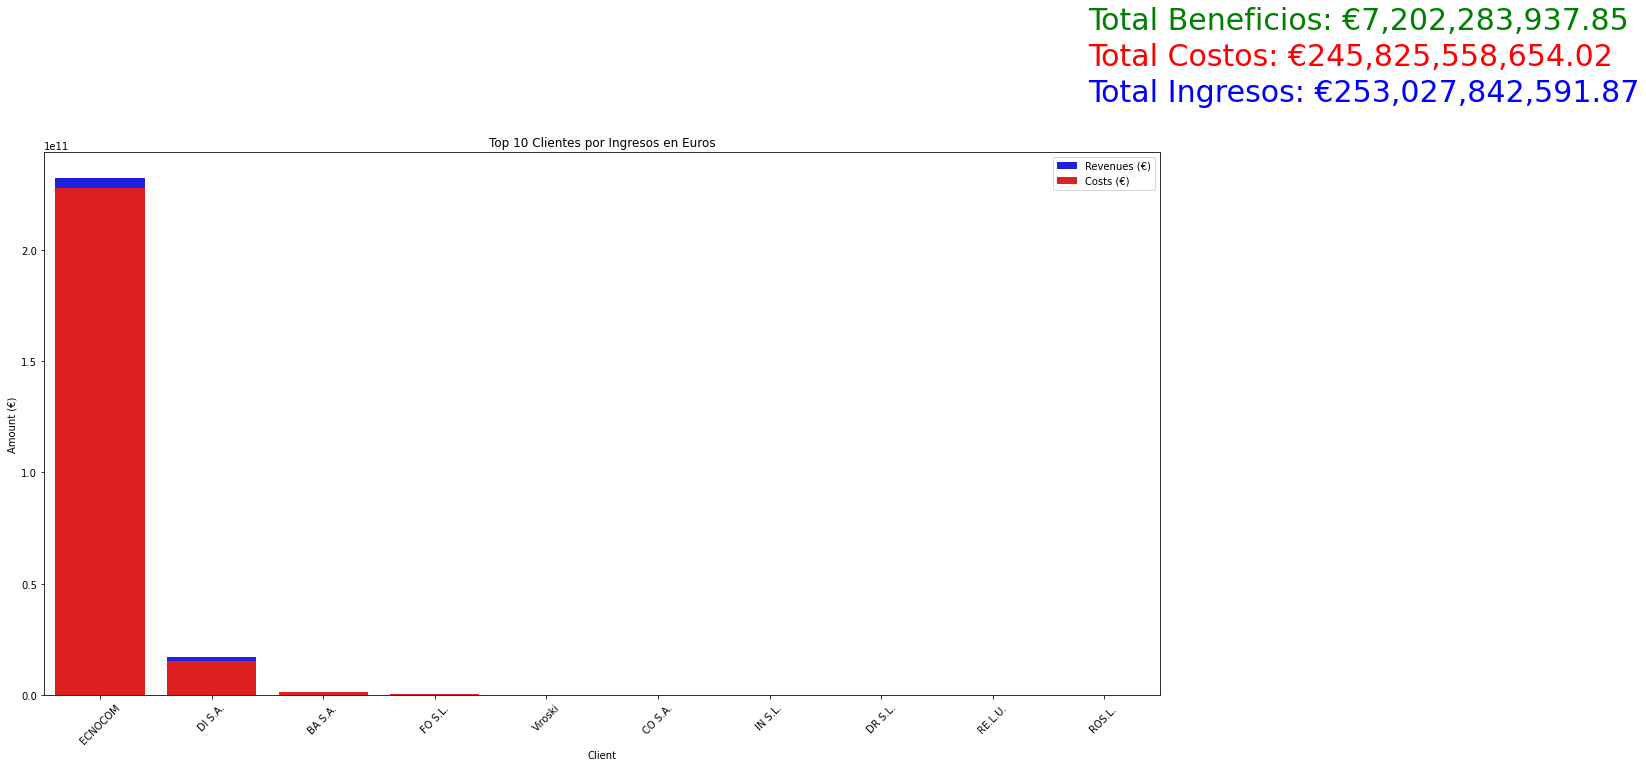

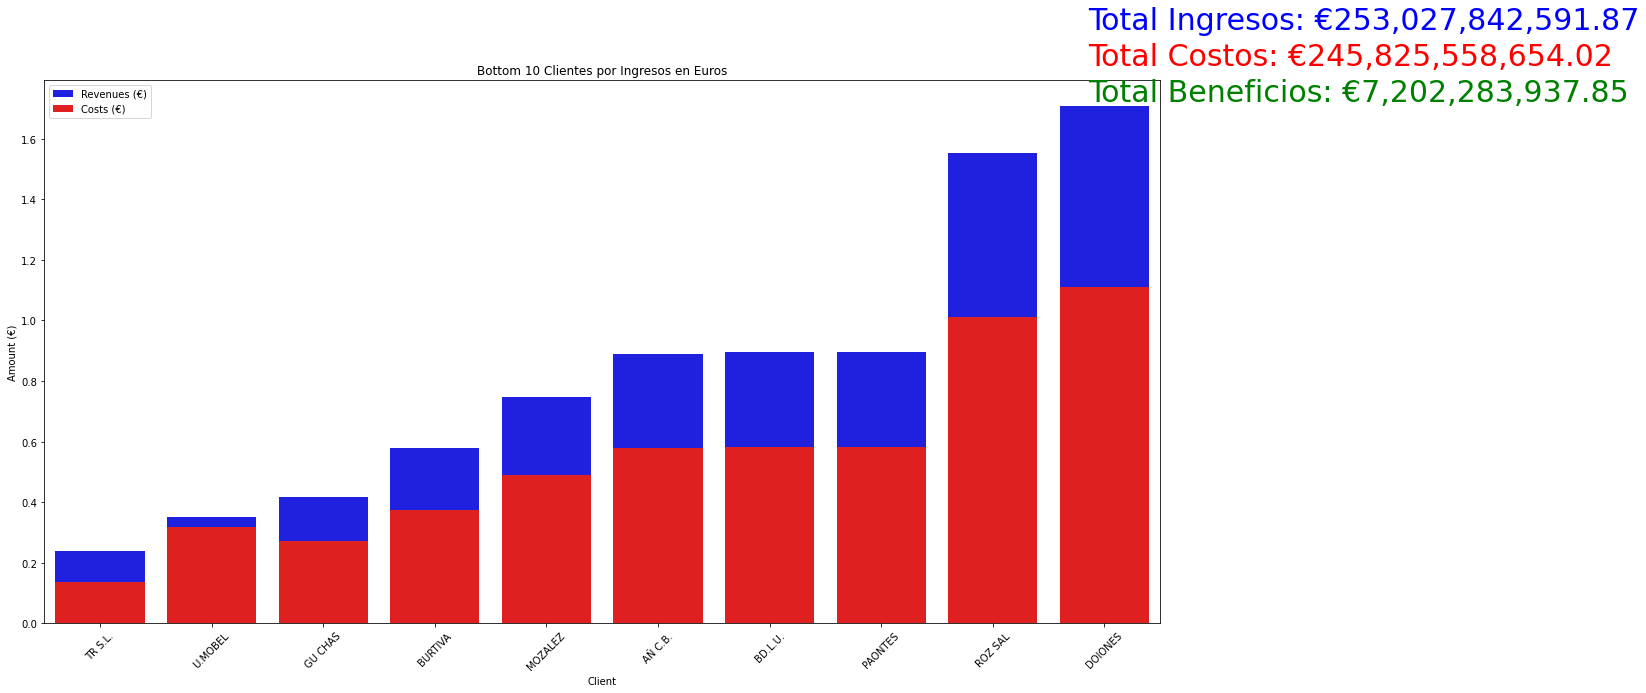

235


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo Excel (ya que no tienes el archivo aquí, el código está adaptado para tu estructura)
df = pd.read_excel("./project_dataset/IronHack_Media_dataset.xlsx")

# Diccionario de tasas de conversión (al 6 de noviembre de 2024)
conversion_rates = {
    'EUR': 1,
    'Peso CO': 0.000211,
    'Peso MX': 0.05,
}

# Convertir los ingresos y costos a euros utilizando las tasas de conversión
df['Revenues_EUR'] = df.apply(lambda row: row['Revenues'] * conversion_rates.get(row['Currency'], 1), axis=1)
df['Costs_EUR'] = df.apply(lambda row: row['Costs'] * conversion_rates.get(row['Currency'], 1), axis=1)

# Análisis por Cliente: Agrupar por cliente y sumar los ingresos y costos en euros
cliente_df = df.groupby('Client').agg({'Revenues_EUR': 'sum', 'Costs_EUR': 'sum'}).reset_index()
cliente_df['Profit'] = cliente_df['Revenues_EUR'] - cliente_df['Costs_EUR']

# Calcular los totales de las columnas
totals = cliente_df[['Revenues_EUR', 'Costs_EUR', 'Profit']].sum()

# Mostrar los totales
print("Totales Generales:")
print(f"Total de Ingresos (Revenues) en Euros: €{totals['Revenues_EUR']:,.2f}")
print(f"Total de Costos en Euros: €{totals['Costs_EUR']:,.2f}")
print(f"Total de Beneficios (Profit) en Euros: €{totals['Profit']:,.2f}")

# Seleccionar los 10 clientes más altos y los 10 más bajos por ingresos
top_10_clients = cliente_df.nlargest(10, 'Revenues_EUR')
bottom_10_clients = cliente_df.nsmallest(10, 'Revenues_EUR')

# Crear el gráfico para los 10 clientes más altos
plt.figure(figsize=(20, 10))
sns.barplot(x='Client', y='Revenues_EUR', data=top_10_clients, color='b', label='Revenues (€)')
sns.barplot(x='Client', y='Costs_EUR', data=top_10_clients, color='r', label='Costs (€)')
plt.xlabel("Client")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Top 10 Clientes por Ingresos en Euros")
plt.xticks(rotation=45)

# Agregar los totales como texto a la derecha del gráfico, con márgenes top y right
margin_top = 0.05  # Márgenes en la parte superior (5% de la altura de la figura)
margin_right = 0.85  # Márgenes a la derecha (85% del ancho de la figura)

# Ajustar los márgenes según el porcentaje de la figura
plt.figtext(margin_right, 1 - margin_top, f"Total Ingresos: €{totals['Revenues_EUR']:,.2f}", fontsize=30, color='blue', ha='left')
plt.figtext(margin_right, 1 - (margin_top - 0.05), f"Total Costos: €{totals['Costs_EUR']:,.2f}", fontsize=30, color='red', ha='left')
plt.figtext(margin_right, 1 - (margin_top - 0.10), f"Total Beneficios: €{totals['Profit']:,.2f}", fontsize=30, color='green', ha='left')

plt.show()

# Crear el gráfico para los 10 clientes más bajos
plt.figure(figsize=(20, 10))
sns.barplot(x='Client', y='Revenues_EUR', data=bottom_10_clients, color='b', label='Revenues (€)')
sns.barplot(x='Client', y='Costs_EUR', data=bottom_10_clients, color='r', label='Costs (€)')
plt.xlabel("Client")
plt.ylabel("Amount (€)")
plt.legend()
plt.title("Bottom 10 Clientes por Ingresos en Euros")
plt.xticks(rotation=45)

# Agregar los totales como texto a la derecha del gráfico, con márgenes top y right
plt.figtext(margin_right, 1 - margin_top, f"Total Ingresos: €{totals['Revenues_EUR']:,.2f}", fontsize=30, color='blue')
plt.figtext(margin_right, 1 - (margin_top + 0.05), f"Total Costos: €{totals['Costs_EUR']:,.2f}", fontsize=30, color='red')
plt.figtext(margin_right, 1 - (margin_top + 0.10), f"Total Beneficios: €{totals['Profit']:,.2f}", fontsize=30, color='green')

plt.show()

import pandas as pd

# Cargar los datos desde el archivo Excel (ajusta la ruta del archivo según sea necesario)
df = pd.read_excel("./project_dataset/IronHack_Media_dataset.xlsx")

# Calcular la cantidad de clientes únicos
cantidad_clientes = df['Client'].nunique()
cantidad_clientes
print (cantidad_clientes)